# Well Location Selection

<b>Aim</b>

To select a region for drilling a new well.

<br><b>Background</b>

Oil samples from three regions have been provided: in each, there are 100,000 deposits where the oil quality and its reserves volume have been measured. It is necessary to construct a machine learning model that will help determine the region where production will yield the highest profit. Analyze potential profit and risks using the Bootstrap  *Bootstrap* technique.

<br><b>Data Description</b>

Features:
- *id* — unique well identifier;
- *f0, f1, f2* — three significant features of the points (it doesn't matter what they mean, but the features themselves are significant).

Target Feature:
- *product* — volume of reserves in the well (thousand barrels).

## Data Loading and Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

In [2]:
# save key values for calculations

BUDGET = 1e10
POINTS = 500
POINTS_CHOOSE = 200
BARREL_PRICE = 450 
PRODUCT_PRICE = BARREL_PRICE * 1000

In [3]:
# open databases

try:
    df0 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
except:
    df0 = pd.read_csv('geo_data_0.csv')
    
try:
    df1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
except:
    df1 = pd.read_csv('geo_data_1.csv')
    
try:
    df2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')
except:
    df2 = pd.read_csv('geo_data_2.csv')

In [4]:
def df_information(df):
    print(df.info())
    print('')
    print(df.head())
    print('')
    print('Duplicate Count:',df.duplicated().sum())
    print('')
# considering there might be non-obvious duplicates 
# (e.g., data from the same well obtained at different times), check if all wells are unique
    print('Unique Well Count:', len(set(df['id'])))

# function for describing and displaying processed data
def df_description(df):
    print(df.describe())
    print('')
    df.hist(figsize=(10,10))
    plt.show()
    plt.figure(figsize=(10,10))
    sns.heatmap(df.corr(), cmap='OrRd', center=0, annot=True)
    plt.show()

In [5]:
# study the information on the region geo_data_0

df_information(df0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

Duplicate Count: 0

Unique Well Count: 99990


In [6]:
# since there are non-unique wells, delete them

df0 = df0.drop_duplicates(subset=['id'], ignore_index=True)

In [7]:
# study the information on the region geo_data_1

df_information(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

Duplicate Count: 0

Unique Well Count: 99996


In [8]:
# since there are non-unique wells, delete them

df1 = df1.drop_duplicates(subset=['id'], ignore_index=True)

In [9]:
# study the information on the region geo_data_2

df_information(df2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746

Duplicate Count: 0

Unique Well Count: 99996


In [10]:
# since there are non-unique wells, delete them

df2 = df2.drop_duplicates(subset=['id'], ignore_index=True)

In [11]:
# the id column has served its purpose, it can now be removed
df0.drop('id', axis=1, inplace=True)
df1.drop('id', axis=1, inplace=True)
df2.drop('id', axis=1, inplace=True)

                 f0            f1            f2       product
count  99990.000000  99990.000000  99990.000000  99990.000000
mean       0.500454      0.250141      2.502629     92.499684
std        0.871844      0.504430      3.248149     44.288304
min       -1.408605     -0.848218    -12.088328      0.000000
25%       -0.072572     -0.200877      0.287784     56.497069
50%        0.502405      0.250252      2.515969     91.847928
75%        1.073626      0.700640      4.715035    128.563699
max        2.362331      1.343769     16.003790    185.364347



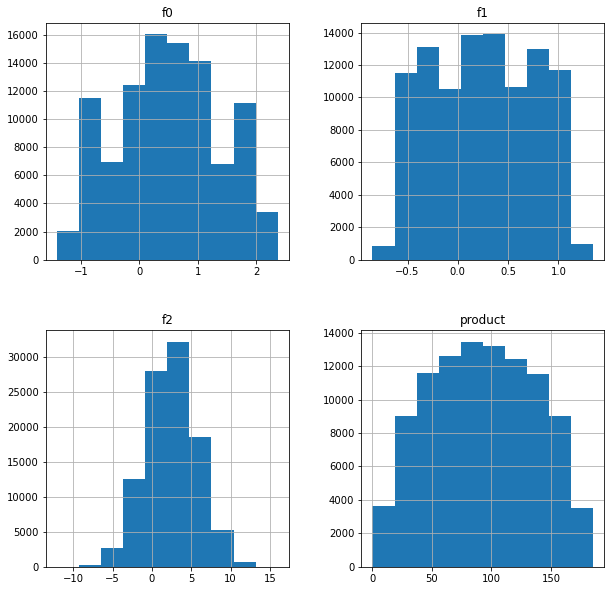

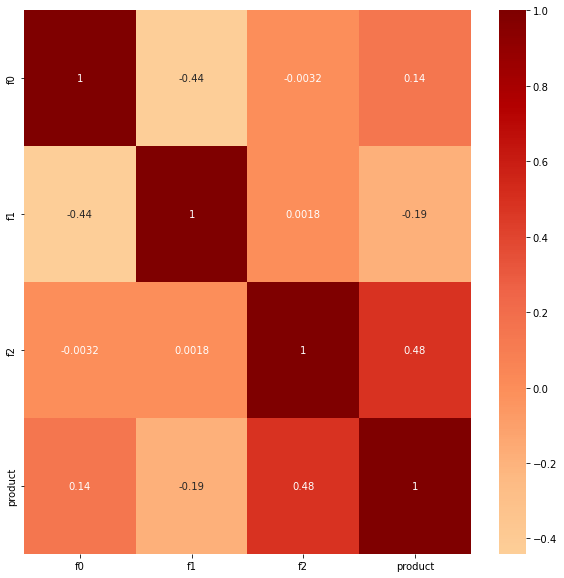

In [12]:
# The data is processed, and we can now take a detailed look at the data characteristics

df_description(df0)

                 f0            f1            f2       product
count  99996.000000  99996.000000  99996.000000  99996.000000
mean       1.141209     -4.796608      2.494501     68.823916
std        8.965815      5.119906      1.703579     45.944663
min      -31.609576    -26.358598     -0.018144      0.000000
25%       -6.298551     -8.267985      1.000021     26.953261
50%        1.153055     -4.813172      2.011475     57.085625
75%        8.620964     -1.332816      3.999904    107.813044
max       29.421755     18.734063      5.019721    137.945408



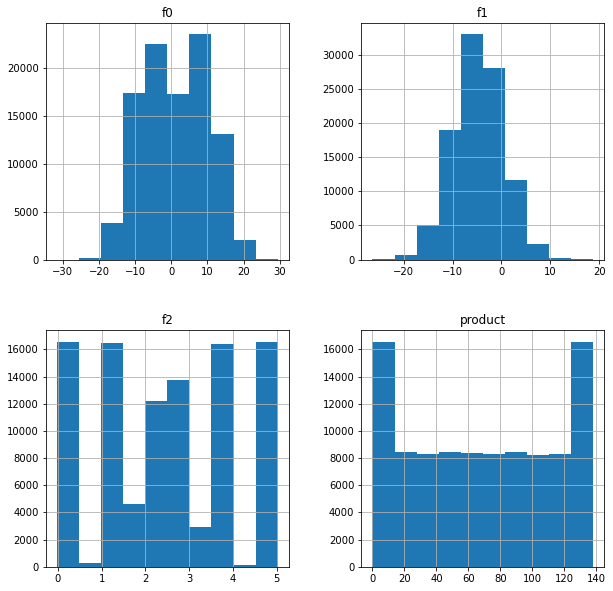

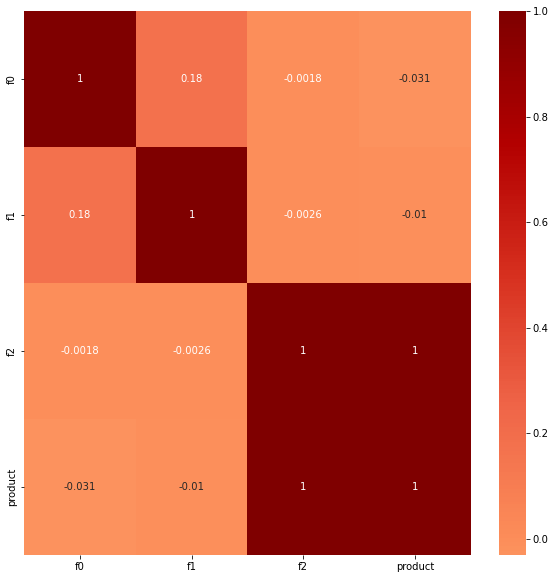

In [13]:
df_description(df1)

                 f0            f1            f2       product
count  99996.000000  99996.000000  99996.000000  99996.000000
mean       0.002002     -0.002159      2.495084     94.998342
std        1.732052      1.730397      3.473482     44.749573
min       -8.760004     -7.084020    -11.970335      0.000000
25%       -1.162328     -1.174841      0.130269     59.450028
50%        0.009424     -0.009661      2.484236     94.925026
75%        1.158477      1.163523      4.858720    130.586815
max        7.238262      7.844801     16.739402    190.029838



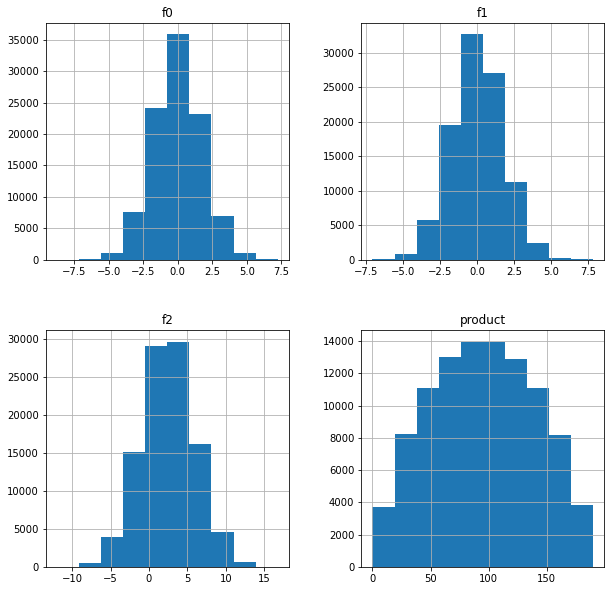

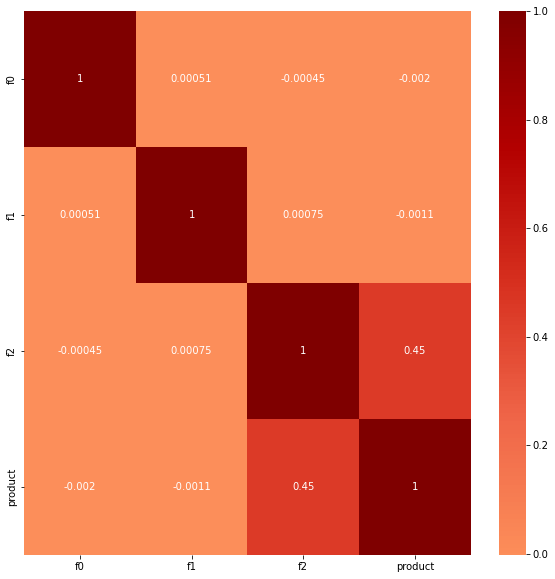

In [14]:
df_description(df2)

<b>Conclusions</b>

At this stage, we have analyzed the data from the 3 provided datasets. The data types match the columns, no omissions or obvious duplicates were identified, however, all datasets contained non-unique wells which were removed from the analysis.

After cleaning the data, we analyzed the features and the target feature in each dataset. In the datasets "geo_data_0" and "geo_data_2", no anomalies were recorded, the features are generally distributed normally, we see a weak positive correlation (0.48 and 0.45 respectively) between the f2 feature and the target feature product in both datasets.

In the geo_data_1 dataset, the following oddities were recorded: a very large number of wells with extremely low and extremely high reserves with a very large "plateau" between these extremes. In addition, a correlation of one between the f2 feature and product also indicates that the data in the presented dataset might be defective (possibly even fabricated). Given the above, this dataset will be used for further analysis within the framework of the educational project.

## Training and Model Verification

In [15]:
# function for model training and prediction

def train_predict_model(df):
    features = df.drop(['product'], axis=1)
    target = df["product"]
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    numeric = ['f0', 'f1', 'f2']
    scaler = StandardScaler()
    scaler.fit(features_train[numeric])
    features_train[numeric] = scaler.transform(features_train[numeric])
    features_valid[numeric] = scaler.transform(features_valid[numeric])
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    predicted_valid = pd.Series(predicted_valid, index=features_valid.index)
    rmse = (mean_squared_error(predicted_valid, target_valid))**0.5
    
    print('Checking the uniformity of sample distribution:')
    print('Training set size:', features_train.shape)
    print('Validation set size:', features_valid.shape)
    print('')
    print('Modeling results:')
    print('Average predicted oil reserves in the region: {0:.3f}'
          .format((sum(predicted_valid) / len(predicted_valid))))
    print('RMSE: {0:.3f}'.format(rmse))
    return(predicted_valid, target_valid)

In [16]:
print('Region geo_data_0:')
print('')
predicted_valid_0, target_valid_0 = train_predict_model(df0)
print('')
print('Region geo_data_1:')
print('')
predicted_valid_1, target_valid_1 = train_predict_model(df1)
print('')
print('')
print('Region geo_data_2:')
print('')
predicted_valid_2, target_valid_2 = train_predict_model(df2)

Region geo_data_0:

Checking the uniformity of sample distribution:
Training set size: (74992, 3)
Validation set size: (24998, 3)

Modeling results:
Average predicted oil reserves in the region: 92.789
RMSE: 37.854

Region geo_data_1:

Checking the uniformity of sample distribution:
Training set size: (74997, 3)
Validation set size: (24999, 3)

Modeling results:
Average predicted oil reserves in the region: 69.178
RMSE: 0.892


Region geo_data_2:

Checking the uniformity of sample distribution:
Training set size: (74997, 3)
Validation set size: (24999, 3)

Modeling results:
Average predicted oil reserves in the region: 94.866
RMSE: 40.076


<b>Conclusions</b>

In the geo_data_0 and geo_data_2 regions, the results are roughly similar - the geo_data_0 region has slightly fewer oil reserves, with a slightly smaller prediction error. The geo_data_1 region has the smallest amount of oil in the well with an extremely low prediction error - less than 1.

## Preparation for Profit Calculation

In [17]:
# calculating the necessary oil volume for a well to break even

average_point_budget = BUDGET / POINTS_CHOOSE
potint_product_volume = average_point_budget / PRODUCT_PRICE

print("Oil volume required for a well's break-even development: {:.1f} thousand barrels".format(potint_product_volume))

Oil volume required for a well's break-even development: 111.1 thousand barrels


In [18]:
# for information - how many percent of profitable wells are in each region.

def points_111 (df):
    return len(df.loc[df['product']>111.1]) / len(df)

print(f'Percentage of deposits in the geo_data_0 region with oil reserves of more than 111.1 thousand barrels: {points_111(df0):.1%}')
print(f'Percentage of deposits in the geo_data_1 region with oil reserves of more than 111.1 thousand barrels: {points_111(df1):.1%}')
print(f'Percentage of deposits in the geo_data_2 region with oil reserves of more than 111.1 thousand barrels: {points_111(df2):.1%}')

Percentage of deposits in the geo_data_0 region with oil reserves of more than 111.1 thousand barrels: 36.6%
Percentage of deposits in the geo_data_1 region with oil reserves of more than 111.1 thousand barrels: 16.5%
Percentage of deposits in the geo_data_2 region with oil reserves of more than 111.1 thousand barrels: 38.2%


<b>Conclusions</b>

The break-even point for a well is 111.1 thousand barrels. There are slightly more such wells in the geo_data_2 region. The smallest number of break-even wells is in the geo_data_1 region - almost half as many as in the other two regions.

## Profit and Risk Calculation

In [19]:
# function for displaying oil volume and calculating profit in selected wells

def oil_profit1(target_valid, predicted_valid, POINTS_CHOOSE):
    top_points_pred = predicted_valid.sort_values(ascending=False)
    top_points_targ = target_valid[top_points_pred.index][:POINTS_CHOOSE]
    top_oil_volume = top_points_targ.sum()
    profit = PRODUCT_PRICE * top_oil_volume - BUDGET
    return profit, top_oil_volume

In [20]:
profit_0, top_oil_volume_0 = oil_profit1(target_valid_0, predicted_valid_0, POINTS_CHOOSE)
profit_1, top_oil_volume_1 = oil_profit1(target_valid_1, predicted_valid_1, POINTS_CHOOSE)
profit_2, top_oil_volume_2 = oil_profit1(target_valid_2, predicted_valid_2, POINTS_CHOOSE)

In [21]:
print('Calculating profit and oil volume for the best wells in the regions:')
print('')
print('For the geo_data_0 region:')
print('Oil volume in the top 200 wells in the region: {:.1f} thousand barrels,'
      .format(top_oil_volume_0),'profit from development: {:.1f} billion rubles'
      .format(profit_0/1e9))
print('')
print('For the geo_data_1 region:')
print('Oil volume in the top 200 wells in the region: {:.1f} thousand barrels,'
      .format(top_oil_volume_1),'profit from development: {:.1f} billion rubles'
      .format(profit_1/1e9))
print('')
print('For the geo_data_2 region:')
print('Oil volume in the top 200 wells in the region: {:.1f} thousand barrels,'
      .format(top_oil_volume_2),'profit from development: {:.1f} billion rubles'
      .format(profit_2/1e9))

Calculating profit and oil volume for the best wells in the regions:

For the geo_data_0 region:
Oil volume in the top 200 wells in the region: 29700.4 thousand barrels, profit from development: 3.4 billion rubles

For the geo_data_1 region:
Oil volume in the top 200 wells in the region: 27589.1 thousand barrels, profit from development: 2.4 billion rubles

For the geo_data_2 region:
Oil volume in the top 200 wells in the region: 27780.6 thousand barrels, profit from development: 2.5 billion rubles


In [22]:
state = np.random.RandomState(12345)

In [23]:
# Function for revenue, 95% CI, and risk for the region using bootstrap

def oil_profit_boot(target_valid, predicted_valid):
    values = []
    for i in range(1000):
        target_subsample = target_valid.sample(n=POINTS, replace=True, random_state=state)
        probs_subsample = predicted_valid[target_subsample.index]
        fin_profit,_ = oil_profit1(target_subsample, probs_subsample, POINTS_CHOOSE)
        values.append(fin_profit)
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean_profit = int(sum(values) / len(values))
    risk = (values <= 0).sum() / 1000
    
    print('The average profit from the development of deposits in the region is: {:.3f} billion rub'
      .format(mean_profit/10**9))
    print('The 95% confidence interval ranges from {:.3f}'.format(lower/10**9), 'до {:.3f} billion rub'
         .format(upper/10**9))
    print(f'The risk of not making a profit from development is {risk:.1%}')

In [24]:
print('For the geo_data_0 region:')
oil_profit_boot(target_valid_0, predicted_valid_0)

For the geo_data_0 region:
The average profit from the development of deposits in the region is: 0.409 billion rub
The 95% confidence interval ranges from -0.132 до 0.944 billion rub
The risk of not making a profit from development is 7.1%


In [25]:
print('For the geo_data_1 region:')
oil_profit_boot(target_valid_1, predicted_valid_1)

For the geo_data_1 region:
The average profit from the development of deposits in the region is: 0.536 billion rub
The 95% confidence interval ranges from 0.113 до 0.999 billion rub
The risk of not making a profit from development is 0.3%


In [26]:
print('For the geo_data_2 region:')
oil_profit_boot(target_valid_2, predicted_valid_2)

For the geo_data_2 region:
The average profit from the development of deposits in the region is: 0.339 billion rub
The 95% confidence interval ranges from -0.224 до 0.847 billion rub
The risk of not making a profit from development is 11.8%


## Conclusions

Our task was to analyze 3 regions to choose the best one for oil field development.

An initial data analysis was conducted. It was found that the data in the geo_data_1 region was compiled and presented quite oddly - an abnormal distribution of the amount of oil in the wells (many wells with a small amount of oil and many with a large amount, which is questionable), one of the features shows a very strong correlation with the amount of oil (a correlation strength of 1, which is also very questionable). For these reasons, the geo_data_1 region was analyzed as part of a training project. Minimal changes were made to the databases of the other regions - duplicate wells were removed (there were very few of them - from 5 to 10), and after processing, the column with well identifiers was removed from the database as it was not needed for further analysis.

A linear regression model was trained in two regions - in the geo_data_0 region, the model predicted an average oil reserve value of 92.789 thousand barrels per well with an RMSE of 37.854, in the geo_data_1 region - 69.178 with an RMSE of 0.892, geo_data_2 - 94.866 thousand barrels with a prediction error of 40.076. The break-even point in terms of oil volume in the well is 111.1 thousand barrels, which is more than the average volume of oil in the well in both regions. However, there are quite a few wells with an oil amount of more than 111.1 - over a third in the geo_data_0 and geo_data_2 regions (36.6% and 38.2% respectively) and only 16.5% in the geo_data_1 region.

Then, using the Bootstrap procedure, the average profit from the development of deposits in the regions, the 95% confidence interval, and the risk of not making a profit were found. The target risk value (less than 2.5%) was achieved in the geo_data_1 region. It also shows the best profit indicator, higher values of the lower and upper quartile in the confidence interval.

In light of the above, the geo_data_1 region is recommended for field development.